<a href="https://colab.research.google.com/github/Someshwarms/Fake-News-Classifier/blob/main/Fake_news_detctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

**Loading the dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

**As we can see there too many null values in this dataset so to slove this particaular problem  we basically dorp all those column which have null values with the help of fuction called dropna.because the dataset is too big it will not going to effect the dataset.**

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(18285, 5)

**Now lets the dataset is balanced or imbalanced.If suppose the dataset wil imbalnced at that to make the dataset balanced we will use oversampling otherwise if the datset is already balanced there is no need  to perform oversampling on dependent feature.**

In [ ]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


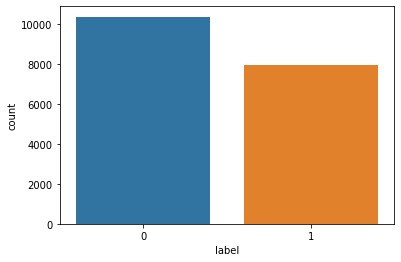

In [ ]:
sns.countplot('label',data=df)

**Now we will divide the dataset into dependent and independent feature**

In [ ]:
X=df.drop('label',axis=1)#independent 
y=df['label']#dependent 

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
X.shape

(18285, 4)

In [ ]:
y.shape

(18285,)

**Now as we all know that we cannot pass the text based data to our model we have to convert all these text data into numerical format then the data can be passed to the model.To convert this text data into numerical data we will use one hoot representation.**

In [ ]:
voc_size=5000

In [ ]:
message=X.copy()

In [ ]:
message['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [ ]:
message['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [ ]:
#lets reset the index of thsi column
message.reset_index(inplace=True)

**Now we will import nltk package for datapreprocessing and we will download stopword data with the help of nltk to remove all the stopword presenyt in our main data**

In [ ]:
import nltk 
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#with the help of regression package and nltk package we will remove all the stopword from it
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
  print(i)
  review=re.sub('[^a-zA-Z]', ' ', message['title'][i])
  review=review.lower()  
  review=review.split()  
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
onehot_rep=[tf.keras.preprocessing.text.one_hot(words,voc_size)for words in corpus]
onehot_rep

[[3852, 42, 2460, 502, 1537, 731, 2570, 3987, 1380, 453],
 [2668, 77, 3288, 2975, 393, 3612, 2822],
 [3812, 724, 3820, 933],
 [2109, 957, 864, 3940, 1659, 4896],
 [1254, 393, 4327, 2607, 4530, 2903, 393, 1775, 3728, 300],
 [756,
  714,
  972,
  2297,
  2626,
  2735,
  2436,
  4303,
  1471,
  251,
  4475,
  463,
  4051,
  4737,
  2822],
 [2710, 1707, 4507, 2775, 837, 1335, 3616, 3280, 2023, 2980, 576],
 [4330, 2872, 399, 4295, 4521, 1161, 2735, 1357, 2023, 2980, 576],
 [3497, 1053, 4369, 1686, 1992, 332, 314, 1215, 2735, 3608],
 [1429, 352, 1390, 572, 4090, 3631, 4635, 286],
 [2777, 3519, 339, 2178, 931, 2542, 1593, 4723, 2750, 2441, 1495],
 [3940, 1059, 1537, 332, 2735, 4521],
 [1895, 474, 4895, 3065, 431, 457, 1416, 4242, 4814],
 [1478, 3336, 2328, 2083, 4726, 2585, 928, 2023, 2980, 576],
 [1786, 1484, 864, 4362, 2690, 2023, 2980, 576],
 [1333, 3022, 2907, 1987, 1453, 3234, 4627, 3080, 1932, 2093],
 [207, 325, 77],
 [2537, 2260, 3982, 4165, 2735, 1513, 4724, 2822],
 [4454, 1847, 3288,

**Now we will perform padding on this numerical data**

In [ ]:
sent_length=20
embedded_docs=tf.keras.preprocessing.sequence.pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3987 1380  453]
 [   0    0    0 ...  393 3612 2822]
 [   0    0    0 ...  724 3820  933]
 ...
 [   0    0    0 ... 2023 2980  576]
 [   0    0    0 ...  412 3447 1084]
 [   0    0    0 ... 3547 3847 2331]]


In [ ]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2668,   77, 3288, 2975,  393, 3612, 2822], dtype=int32)

**Now will create model based on bidirectional LSTM(Long short term memory) it is much faster then normal LSTM**

In [ ]:
embedding_vector_features=40
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(embedded_docs),y.shape

(18285, (18285,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape

(18285, 20)

In [ ]:
y_final.shape

(18285,)

In [ ]:
X_final[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2668,   77, 3288, 2975,  393, 3612, 2822], dtype=int32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.35,random_state=42)

In [ ]:
X_train.shape

(11885, 20)

In [ ]:
y_train.shape

(11885,)

In [ ]:
X_test.shape

(6400, 20)

In [ ]:
y_test.shape

(6400,)

**lets train the model for 

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.4265 - val_accuracy: 0.9161
Epoch 2/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.3807 - val_accuracy: 0.9109
Epoch 3/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.3933 - val_accuracy: 0.9156
Epoch 4/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.5014 - val_accuracy: 0.9150
Epoch 5/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.6001 - val_accuracy: 0.9162
Epoch 6/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.5784 - val_accuracy: 0.9073
Epoch 7/10
186/186 [==============================] - 6s 31ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.5266 - val_accuracy: 0.9102

**As we can see in val_loss thers is some overfitting problem with bidirectional LSTM or with Normal LSTM both.It may be because of text vectorization(one_hot representation) we can overcome this overfitting problem of val_loss by using word2vec instead of one hot representaion**





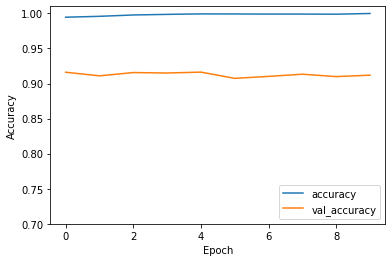

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.01])
plt.legend(loc='lower right')

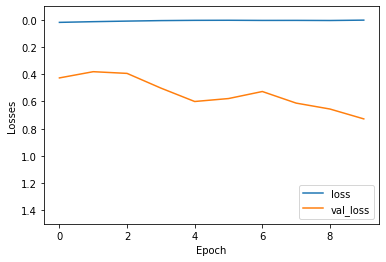

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.ylim([1.5,-0.1])
plt.legend(loc='lower right')

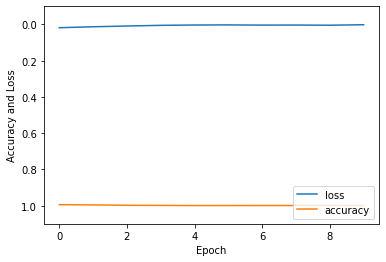

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.ylim([1.1, -0.1])
plt.legend(loc='lower right')

**Model Evaluation**

In [ ]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)

200/200 - 1s - loss: 0.7281 - accuracy: 0.9119 - 1s/epoch - 7ms/step


In [ ]:
print("Accuracy:",acc*100)
print("Loss:",loss)

Accuracy: 91.18750095367432
Loss: 0.7280514240264893


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([[1.0000000e+00],
       [3.9044417e-06],
       [2.3767352e-03],
       ...,
       [3.8285336e-07],
       [9.9999791e-01],
       [5.8043230e-01]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

0.911875

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3325,  308],
       [ 256, 2511]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3633
           1       0.89      0.91      0.90      2767

    accuracy                           0.91      6400
   macro avg       0.91      0.91      0.91      6400
weighted avg       0.91      0.91      0.91      6400



In [ ]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
inut_data=y_pred[0]

In [ ]:
if inut_data==True:
  print("Correct news")
else:
  print("Fake news")

Correct news


In [ ]:
inut_data=y_pred[1]

In [ ]:
if inut_data==True:
  print("Correct news")
else:
  print("Fake news")

Fake news


**After using Neural Network i used RandomForest Algorithm on the same it even gave good reslut without any hyperparameter optimization almost 90% of accuracy with this algorithm.As we can see in confusion matrix we need to reduce the False Negative because it is little higher it can be because of 1 reason that is using one_hot method for text vectorization instead of one hot we can use word2vec then may be this problem will get sloved and in addition if we apply hyper parameter optimization it may be will give accuracy more then 95%.**

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV
X_tain1,X_test1,y_train1,y_test1=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [ ]:
model=RandomForestClassifier().fit(X_tain1,y_train1)

In [ ]:
y_pred1=model.predict(X_test1)
print("Accuracy_score:",accuracy_score(y_test1,y_pred1)*100)
print("\n")
print("Confusion Matrix:\n",confusion_matrix(y_pred1,y_test1))
print("\n")
print("Classifictaion Report:\n",classification_report(y_pred1,y_test1))
print("\n")

Accuracy_score: 89.72659486329742


Confusion Matrix:
 [[2812   13]
 [ 607 2603]]


Classifictaion Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2825
           1       1.00      0.81      0.89      3210

    accuracy                           0.90      6035
   macro avg       0.91      0.90      0.90      6035
weighted avg       0.91      0.90      0.90      6035





In [ ]:
y_pred1

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
input_data=y_pred1[12]

In [ ]:
if input==1:
  print("correct news")
else:
  print("Fake news")

Fake news


In [ ]:
input=y_pred1[0]
if input==1:
  print("correct news")
else:
  print("Fake news")

correct news


**Using Naive Bayes algorithm without hyperparameter optimization it gaved normal result but befor passing the data into the lagorithm need to scale down the value.**

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train2)

In [ ]:
model2=BernoulliNB().fit(X_train_scaled,y_train2)

In [ ]:
X_test_scaled=scaler.transform(X_test2)

In [ ]:
y_pred2=model2.predict(X_test_scaled)

In [ ]:
y_pred2

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print("Accuracy_score:",accuracy_score(y_test2,y_pred2)*100)
print("\n")
print("Confusion Matrix:\n",confusion_matrix(y_pred2,y_test2))
print("\n")
print("Classifictaion Report:\n",classification_report(y_pred2,y_test2))
print("\n")

Accuracy_score: 72.70919635459818


Confusion Matrix:
 [[2536  764]
 [ 883 1852]]


Classifictaion Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      3300
           1       0.71      0.68      0.69      2735

    accuracy                           0.73      6035
   macro avg       0.72      0.72      0.72      6035
weighted avg       0.73      0.73      0.73      6035



